In [1]:
from scipy import stats
import pandas as pd
import numpy as np

In [31]:
#read diabetes data 
data = pd.read_csv('diabetes2.csv',encoding='latin1')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Output
0,6,148,72,35,0,33.6,0.627,50,1,2
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,2
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,2


In [32]:
#delete zero row entries (using this to avoid )
data= data[data['Glucose'] != 0]
data= data[data['BloodPressure'] != 0]
data= data[data['SkinThickness'] != 0]
data= data[data['Insulin'] != 0]
data= data[data['BMI'] != 0]
data= data[data['DiabetesPedigreeFunction'] != 0]
data= data[data['Age'] != 0]

#reset index
data.reset_index(drop=True, inplace=True)

#save non-zero entry data as 
data.to_csv('diabetesNonzero.csv', index=False)

In [33]:
data = pd.read_csv('diabetesNonzero.csv')

In [34]:
data1 = data.drop(['Outcome'], axis=1)

In [35]:
data1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Output
0,1,89,66,23,94,28.1,0.167,21,0
1,0,137,40,35,168,43.1,2.288,33,2
2,3,78,50,32,88,31.0,0.248,26,0
3,2,197,70,45,543,30.5,0.158,53,2
4,1,189,60,23,846,30.1,0.398,59,2


In [36]:
rho, pval  = stats.spearmanr(data1)

In [37]:
colno = len(data1.columns)
print(colno)

9


In [38]:
df1 = pd.DataFrame(rho.reshape(-1, 9), columns=data1.columns)
df2 = pd.DataFrame(pval.reshape(-1,9), columns=data1.columns)
print (df2)

    Pregnancies        Glucose  BloodPressure  SkinThickness       Insulin  \
0  0.000000e+00   1.481850e-04   2.480555e-03   2.794677e-01  1.469431e-02   
1  1.481850e-04   0.000000e+00   2.168024e-06   1.627776e-05  3.558214e-50   
2  2.480555e-03   2.168024e-06   0.000000e+00   5.276502e-07  9.071193e-03   
3  2.794677e-01   1.627776e-05   5.276502e-07   0.000000e+00  1.360868e-06   
4  1.469431e-02   3.558214e-50   9.071193e-03   1.360868e-06  0.000000e+00   
5  1.952854e-01   7.229242e-05   1.261331e-10   2.531537e-53  1.201129e-09   
6  8.171751e-01   7.725456e-02   6.800731e-01   6.571000e-02  9.136955e-03   
7  2.124375e-45   9.261615e-13   2.306403e-11   1.310729e-06  1.632833e-07   
8  2.100476e-04  2.385051e-140   2.344865e-07   3.213349e-05  1.501266e-38   

            BMI  DiabetesPedigreeFunction           Age         Output  
0  1.952854e-01                  0.817175  2.124375e-45   2.100476e-04  
1  7.229242e-05                  0.077255  9.261615e-13  2.385051e-140  


In [39]:
### we can assign the index back to the column names for the total matrix:
df2=df2.set_index(data1.columns)    #pvalue
#df1=df1.set_index(data1.columns)

In [40]:
import math
pv = []
ind = []
for index, val in df2.iterrows():
    m = (val[8])*10000
    alpha = 0.01
    if m <= alpha:
        pv.append(m)
        ind.append(index)
        print(pv,ind)
pv = pv[:-1]
ind = ind[:-1]

[2.3850506443761055e-136] ['Glucose']
[2.3850506443761055e-136, 0.00234486478757664] ['Glucose', 'BloodPressure']
[2.3850506443761055e-136, 0.00234486478757664, 1.5012661028158062e-34] ['Glucose', 'BloodPressure', 'Insulin']
[2.3850506443761055e-136, 0.00234486478757664, 1.5012661028158062e-34, 2.970889997746633e-06] ['Glucose', 'BloodPressure', 'Insulin', 'Age']
[2.3850506443761055e-136, 0.00234486478757664, 1.5012661028158062e-34, 2.970889997746633e-06, 0.0] ['Glucose', 'BloodPressure', 'Insulin', 'Age', 'Output']


In [41]:
# Selected Features
print(pv,ind)

[2.3850506443761055e-136, 0.00234486478757664, 1.5012661028158062e-34, 2.970889997746633e-06] ['Glucose', 'BloodPressure', 'Insulin', 'Age']


### For Visulaization

In [42]:
import math
pv = []
ind = []
for index, val in df2.iterrows():
    m = (val[8])
    pv.append(abs(np.log(m)))
    ind.append(index)
pv = pv[:-1]
ind = ind[:-1]
pv = [math.floor(float(x)) for x in pv]

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


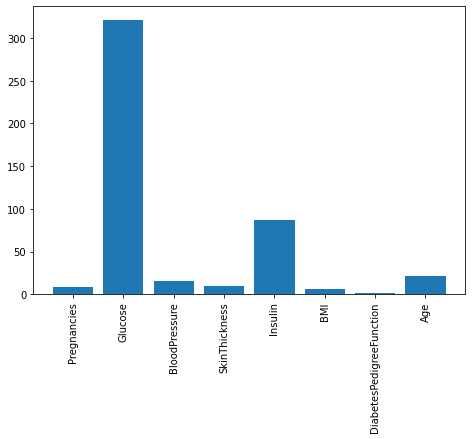

In [43]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind,pv)
plt.xticks(ind, rotation=90)
plt.show()

In [44]:
# Save selected features Nonzero data
data = data[['Glucose','BloodPressure','Insulin','Age','Output']]
data.head()

,Glucose,BloodPressure,Insulin,Age,Output
0,89,66,94,21,0
1,137,40,168,33,2
2,78,50,88,26,0
3,197,70,543,53,2
4,189,60,846,59,2


In [45]:
len(data.index)

392

In [46]:
data.isin([0]).sum()

Glucose           0
BloodPressure     0
Insulin           0
Age               0
Output           98
dtype: int64

In [47]:
data.to_csv('select_features_nonzero.csv', index=False)